# DEPRESSION DETECTION AND ANALYSIS USING EEG SIGNALS

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from keras.models import Sequential
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
#from keras.utils.np_utils import to_categorical
from keras.layers import  MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D
from keras.models import Sequential

In [ ]:
pip install keras

# LOADING DATASET

In [ ]:
def loadDataset(filename):
    global dataset
    dataset = pd.read_csv(filename)
    dataset.Label[dataset.Label == 2.0] = 1.0
    label = dataset.groupby('Label').size()
    label.plot(kind="bar")
    plt.title("Normal & Depressed Records found in dataset 0 (Normal) & 1 (Depressed)")
    plt.show()

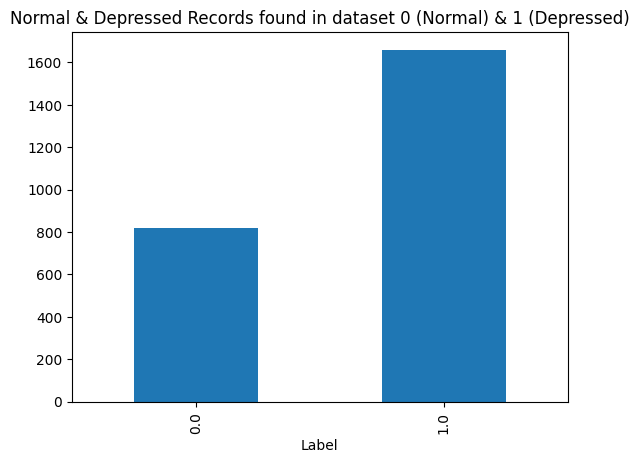

In [ ]:
loadDataset("/content/drive/MyDrive/Dataset/Depression_EEG.csv")
#dataset="/content/drive/MyDrive/Dataset/Depression_EEG.csv"

# DATA PREPROCESSING AND FEATURE EXTRACTION

In [ ]:
def featuresExtraction():
    global dataset, X, Y
    global X_train, X_test, y_train, y_test

    dataset.fillna(0, inplace=True)
    dataset = dataset.values
    X = dataset[:, 0:dataset.shape[1] - 1]
    Y = dataset[:, dataset.shape[1] - 1]
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    X = X[indices]
    Y = Y[indices]

    print(Y)
    print("Extracted Features from EEG Signals\n")
    print(X)
    print("\nTotal features found in each record:", X.shape[1])
    print("Total records found in dataset:", X.shape[0])

    print("\nDataset Train & Test Split Details. 75% dataset used for training & 25% dataset used for testing\n")
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)
    print("Total records used to train algorithms are:", X_train.shape[0])
    print("Total records used to test algorithms are:", X_test.shape[0])

# Example usage:
# Load your dataset into the 'dataset' variable before calling featuresExtraction.
# featuresExtraction()


In [ ]:
featuresExtraction()

[1. 0. 1. ... 0. 1. 0.]
Extracted Features from EEG Signals

[[ 2.76908672e+01  3.50933398e+01  2.43410113e+02 ...  1.62722002e-03
   2.58916389e-04  1.71948385e-03]
 [ 2.41431914e+01  2.06489648e+01  2.69050156e+01 ...  4.27895383e-03
   6.24665503e-03  6.95312397e-03]
 [ 3.32905097e+01  3.47192568e+01  4.82062782e+02 ...  1.21270238e-03
   5.18583289e-04  1.43274243e-03]
 ...
 [ 1.60007812e+01  2.03895430e+01  1.84802813e+01 ...  1.25213948e-02
   2.61116931e-03  1.41307420e-02]
 [ 2.31800000e+01  3.47042227e+01 -1.02876668e+02 ...  6.26508975e-04
   8.85990873e-04  3.80910068e-04]
 [ 1.52206758e+01  1.30844297e+01  1.83029141e+01 ...  1.44274554e-02
   1.17701871e-02  1.20366489e-02]]

Total features found in each record: 988
Total records found in dataset: 2479

Dataset Train & Test Split Details. 75% dataset used for training & 25% dataset used for testing

Total records used to train algorithms are: 1859
Total records used to test algorithms are: 620


In [ ]:
def calculateMetrics(algorithm, predict, testY):
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100
    conf_matrix = confusion_matrix(testY, predict)
    print(algorithm+' Accuracy    : '+str(a)+"\n")
    #print(algorithm+' Precision   : '+str(p)+"\n")
    #print(algorithm+' Recall      : '+str(r)+"\n")
    #print(algorithm+' FScore      : '+str(f)+"\n\n")
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    labels = ['Normal', 'Depressed']
    plt.figure(figsize =(6, 6))
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="viridis" ,fmt ="g");
    ax.set_ylim([0,2])
    plt.title(algorithm+" Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()

# BINARY SVM

In [ ]:
def runSVM():
    global X_train, X_test, y_train, y_test
    global accuracy, precision, recall, fscore
    accuracy = []
    precision = []
    recall = []
    fscore = []

    svm_cls = SVC()
    svm_cls.fit(X_train, y_train)
    predict = svm_cls.predict(X_test)
    calculateMetrics("SVM", predict, y_test)

SVM Accuracy    : 65.96774193548387



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


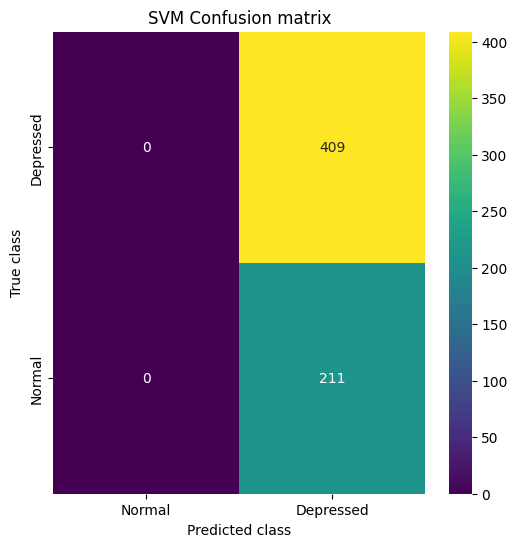

In [ ]:
runSVM()

In [ ]:
from keras.utils import to_categorical

In [ ]:
from keras.models import model_from_json
import keras
from keras.models import Sequential, model_from_json
from keras.models import load_model

In [ ]:
global X_train, X_test, y_train, y_test, X, Y, cnn
global accuracy, precision, recall, fscore
X = X[:, 0:972]
XX = X.reshape(X.shape[0], 18, 18, 3)
YY = to_categorical(Y)
print(XX.shape)

(2479, 18, 18, 3)


In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(XX, YY, test_size=0.25)


In [ ]:
X_train1.shape

(1859, 18, 18, 3)

In [ ]:
X_test1.shape

(620, 18, 18, 3)

In [ ]:
y_train1.shape

(1859, 2)

In [ ]:
y_test1.shape

(620, 2)

# CNN

In [ ]:
cnn = Sequential()
cnn.add(Convolution2D(32, (3, 3), input_shape=(X_train1.shape[1], X_train1.shape[2], X_train1.shape[3]), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Convolution2D(32, (3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(units=256, activation='relu'))
cnn.add(Dense(units=y_test1.shape[1], activation='softmax'))

In [ ]:
print(cnn.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 8, 8, 32)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 32)          9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 3, 3, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 288)               0         
                                                                 
 dense (Dense)               (None, 256)               7

In [ ]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist = cnn.fit(X_train1, y_train1, batch_size=16, epochs=20, shuffle=True, verbose=2, validation_data=(X_test1, y_test1))

Epoch 1/20
117/117 - 1s - loss: 34.1347 - accuracy: 0.8144 - val_loss: 1.2644 - val_accuracy: 0.8403 - 1s/epoch - 13ms/step
Epoch 2/20
117/117 - 1s - loss: 0.8496 - accuracy: 0.8903 - val_loss: 1.2397 - val_accuracy: 0.8661 - 528ms/epoch - 5ms/step
Epoch 3/20
117/117 - 1s - loss: 0.8856 - accuracy: 0.8682 - val_loss: 1.4887 - val_accuracy: 0.8516 - 519ms/epoch - 4ms/step
Epoch 4/20
117/117 - 1s - loss: 21.3681 - accuracy: 0.7816 - val_loss: 2.9515 - val_accuracy: 0.8387 - 520ms/epoch - 4ms/step
Epoch 5/20
117/117 - 1s - loss: 1.3853 - accuracy: 0.8639 - val_loss: 17.4315 - val_accuracy: 0.7597 - 516ms/epoch - 4ms/step
Epoch 6/20
117/117 - 1s - loss: 2.0296 - accuracy: 0.8612 - val_loss: 1.3226 - val_accuracy: 0.8323 - 526ms/epoch - 4ms/step
Epoch 7/20
117/117 - 1s - loss: 0.6839 - accuracy: 0.9026 - val_loss: 1.0324 - val_accuracy: 0.8500 - 582ms/epoch - 5ms/step
Epoch 8/20
117/117 - 1s - loss: 0.5527 - accuracy: 0.9048 - val_loss: 0.7760 - val_accuracy: 0.9226 - 501ms/epoch - 4ms/step

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


20/20 [==============================] - 0s 2ms/step
CNN Accuracy    : 92.41935483870968



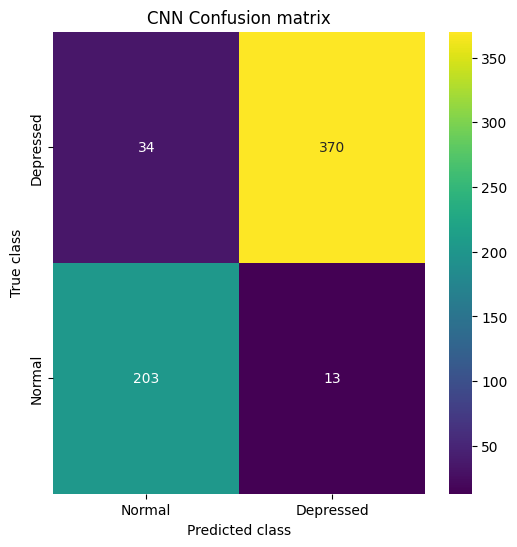

In [ ]:
predict = cnn.predict(X_test1)
predict = np.argmax(predict, axis=1)
testY = np.argmax(y_test1, axis=1)
calculateMetrics("CNN", predict, testY)

In [ ]:
cnn.save("/content/drive/MyDrive/model/model_weights3.keras")

# DEPRESSION PREDICTION

In [ ]:
def predictDepression(model, data_file):
    labels = ["NORMAL", "DEPRESSED"]
    dataset = pd.read_csv(data_file)
    dataset = dataset.values
    testData = dataset[:, 0:972]
    test_X = testData.reshape(testData.shape[0], 18, 18, 3)
    predict = model.predict(test_X)
    predict = np.argmax(predict, axis=1)

    #results = []
    for i in range(len(testData)):
      result = f"{testData[i]} \n  PREDICTED AS ====> {labels[predict[i]]}\n"
      print(result,end=" ")
      print()


In [ ]:
model=load_model("/content/drive/MyDrive/model/model_weights3.keras")
data_file=("/content/drive/MyDrive/Dataset/test_signal.csv")

In [ ]:
predictDepression(model, data_file)

1/1 [==============================] - 0s 211ms/step
[ 2.57816484e+01  3.38363672e+01 -9.27696289e+01  1.91879570e+01
 -1.54226194e+00  1.97462243e-01 -1.19561133e+02  2.03265376e+00
  2.15962716e+01  3.39655870e+01 -4.41852103e+01  2.05667716e+01
  3.13788528e+01  3.35156838e+01 -2.20875498e+01  1.58395188e+01
 -9.78258114e+00  4.49903170e-01 -2.20976605e+01  4.72725282e+00
 -7.84226080e+00 -1.77709348e+00  3.88176808e+02 -2.37833985e+00
  8.97242409e-01  1.79050292e+00 -1.64083369e+02  3.03118815e+00
  1.94032035e+00 -2.22699665e+00  4.10274469e+02 -7.10559267e+00
  1.06798236e+01  1.34059975e+00 -1.41985708e+02 -1.69606467e+00
  1.25405329e+01  3.36150156e+00  2.96058029e+02  8.06173777e+00
  6.43375279e+00  1.82029523e+00  2.60169745e+02  3.54665213e+00
  4.67655360e-01 -2.59805161e-01 -2.75423745e-01  6.07198221e-01
  5.67738735e-01  7.77826492e-01  1.37676212e-02  7.93876892e-01
  6.20450004e+01  4.41922092e+01  5.97148941e+02  4.22564695e+01
  1.73819657e+01  4.84932498e+00  3.1

# COMPARISON OF GRAPHS

<ipython-input-30-095f4f532b93>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df.pivot("Parameters", "Algorithms", "Value").plot(kind='bar')


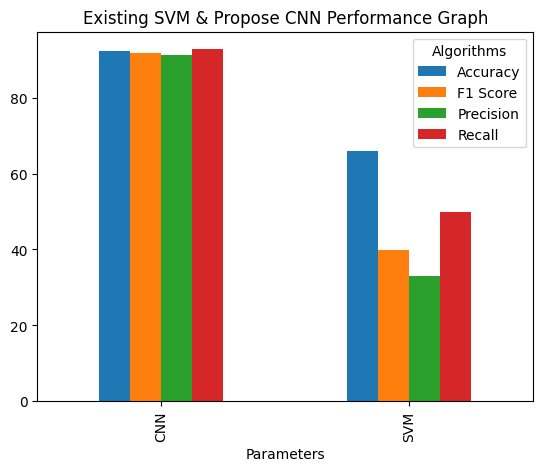

In [ ]:
df = pd.DataFrame([['SVM','Precision',precision[0]],['SVM','Recall',recall[0]],['SVM','F1 Score',fscore[0]],['SVM','Accuracy',accuracy[0]],
                       ['CNN','Precision',precision[1]],['CNN','Recall',recall[1]],['CNN','F1 Score',fscore[1]],['CNN','Accuracy',accuracy[1]],

                      ],columns=['Parameters','Algorithms','Value'])
df.pivot("Parameters", "Algorithms", "Value").plot(kind='bar')
plt.title("Existing SVM & Propose CNN Performance Graph")
plt.show()